<a href="https://colab.research.google.com/github/Shiksha-Yadav/WOC/blob/main/N_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0/500, Loss: 0.6931563964637608
Epoch 100/500, Loss: 0.6890939667549828
Epoch 200/500, Loss: 0.6847872288664509
Epoch 300/500, Loss: 0.681829660038399
Epoch 400/500, Loss: 0.6766090800302987


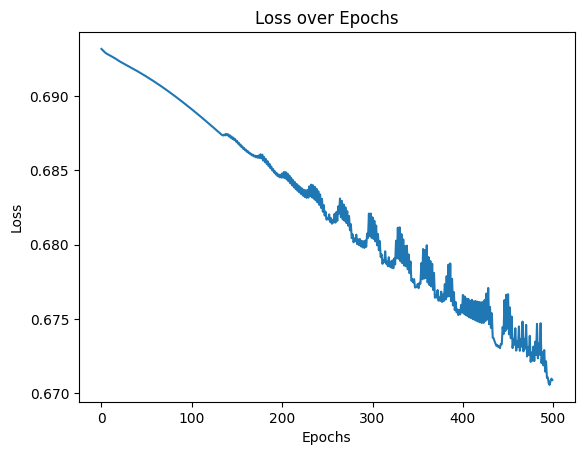

Epoch 0/500, Loss: 2.300149842657356
Epoch 100/500, Loss: 2.245596123515494
Epoch 200/500, Loss: 2.216600837587966
Epoch 300/500, Loss: 2.1990010002246674
Epoch 400/500, Loss: 2.1799843326605197


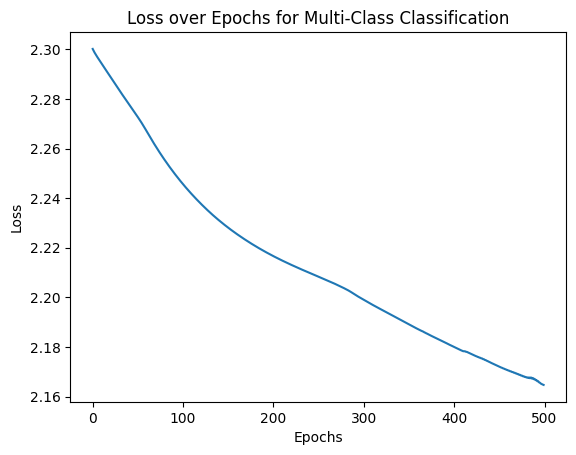

Accuracy Binary: 50.0294%
Accuracy Class: 9.8%


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def matrix(df):
  x= df.iloc[1:,1:-2].values # all columns (features) except the last one (target)
  y1= df.iloc[1:, -2].values
  y2= df.iloc[1:, -1].values

  # Drop rows with NaN values in y
  x = x[~np.isnan(y1)]
  y1 = y1[~np.isnan(y1)]
  y2 = y2[~np.isnan(y2)]
  test_size= 0.2 # what amount of the whole dataset is used for testing
  rows = x.shape[0]
  train_size = int(rows * (1 - test_size))
  x_train = x[:train_size]   # First 80% for training
  x_test = x[train_size:]    # Remaining 20% for testing
  y1_train = y1[:train_size]
  y1_test = y1[train_size:]
  y2_train = y2[:train_size]
  y2_test = y2[train_size:]
  return x_train, x_test, y1_train, y1_test, y2_train, y2_test

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Avoid overflow
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

def train_neural_network_binary(X, y, input_size, hidden_size, output_size, learning_rate, epochs):
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    loss_history = []
    for epoch in range(epochs):
        # Forward propagation
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Ensure y has the correct shape (num_samples, output_size)
        y = y.reshape(-1, output_size)  # Reshape y to a column vector if necessary

        loss = -np.mean(y * np.log(a2 + 1e-7) + (1 - y) * np.log(1 - a2 + 1e-7))
        loss_history.append(loss)

        # Backward propagation
        m = X.shape[0]
        dZ2 = a2 - y  # Error at output layer
        dW2 = np.dot(a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * sigmoid_derivative(a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss}")
    return W1, b1, W2, b2, loss_history

def train_neural_network_multiclass(X, y, input_size, hidden_size, output_size, learning_rate, epochs):
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    loss_history = []
    for epoch in range(epochs):
        # Forward propagation
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = softmax(z2)
        num_samples = y.shape[0]
        y_onehot = np.zeros((num_samples, output_size))
        # Adjust y values to be in range 0 to output_size - 1
        y_adjusted = y.astype(int)
        # Check if adjustment is needed (only if values are greater than or equal to output_size)
        y_adjusted[y_adjusted >= output_size] = output_size - 1
        y_onehot[np.arange(num_samples), y_adjusted] = 1  # One-hot encode labels using adjusted values
        loss = -np.mean(np.sum(y_onehot * np.log(a2 + 1e-7), axis=1))
        loss_history.append(loss)
        #Backward Propagation
        m = X.shape[0]
        dZ2 = a2 - y_onehot
        dW2 = np.dot(a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * sigmoid_derivative(a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss}")
    return W1, b1, W2, b2, loss_history

def predict_binary(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return (a2 > 0.5).astype(int)  # Return binary predictions (0 or 1)

def predict_multiclass(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    predicted_labels = np.argmax(a2, axis=1)
    return predicted_labels

if __name__ == "__main__":
  dataset = "nn_train.csv"
  df= pd.read_csv(dataset) # dataset
  x_train, x_test, y1_train, y1_test, y2_train, y2_test= matrix(df)
  input_size = x_train.shape[1]
  hidden_size = 7
  output_size = 1
  output_size_class = len(np.unique(y2_train)) # The number of unique classes in y2_train
  learning_rate = 0.01
  epochs = 500
  # Train the neural network
  W1_binary, b1_binary, W2_binary, b2_binary, loss_history_binary = train_neural_network_binary(x_train, y1_train, input_size, hidden_size, output_size, learning_rate, epochs)
  # Plot the loss curve
  plt.plot(loss_history_binary)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss over Epochs')
  plt.show()
  W1_class, b1_class, W2_class, b2_class, loss_history_class = train_neural_network_multiclass(x_train, y2_train, input_size, hidden_size, output_size_class, learning_rate, epochs)
  plt.plot(loss_history_class)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss over Epochs for Multi-Class Classification')
  plt.show()

  # Make predictions
  binary_predictions = predict_binary(x_test, W1_binary, b1_binary, W2_binary, b2_binary)
  class_predictions = predict_multiclass(x_test, W1_class, b1_class, W2_class, b2_class)
  accuracy_binary = np.mean(binary_predictions == y1_test) * 100
  accuracy_class = np.mean(class_predictions == y2_test) * 100
  print(f"Accuracy Binary: {accuracy_binary}%")
  print(f"Accuracy Class: {accuracy_class}%")